# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GuilleMGN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news_articles = newsapi.get_everything(q = "Bitcoin", language = "en")

In [6]:
# Fetch the Ethereum news articles
ethereum_news_articles = newsapi.get_everything(q = "Ethereum", language = "en")

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_articles["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        bitcoin_sentiments.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Text": text
        })
    except AttributeError:
        pass

# Create Bitcoin DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.5859,0.000,0.876,0.124,Even if you arent paying attention to Bitcoin ...
1,0.0000,0.000,1.000,0.000,When Denis Rusinovich set up cryptocurrency mi...
2,0.3182,0.000,0.895,0.105,El Salvador introduced Bitcoin as a legal tend...
3,-0.4404,0.083,0.917,0.000,Were officially building an open Bitcoin minin...
4,-0.3182,0.084,0.871,0.045,Israeli national Tal Prihar pled guilty to rou...


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_articles["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        ethereum_sentiments.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Text": text
        })
    except AttributeError:
        pass

# Create Ethereum DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.000,1.000,0.000,"In a new blog post the company said that 4,836..."
1,0.0000,0.000,1.000,0.000,Hackers who made off with roughly $15 million ...
2,0.1779,0.000,0.948,0.052,"On some level, the new mayor is simply employi..."
3,0.0772,0.000,0.962,0.038,"Back in September\r\n, Robinhood announced pla..."
4,-0.2023,0.062,0.899,0.039,If people who buy cryptocurrencies intended on...


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.006585,0.046350,0.896700,0.056950
std,0.422852,0.056707,0.069472,0.059066
min,-0.709600,0.000000,0.729000,0.000000
25%,-0.426225,0.000000,0.874750,0.000000
50%,0.038600,0.000000,0.912000,0.048500
75%,0.328950,0.088000,0.934000,0.108750
max,0.680800,0.169000,1.000000,0.185000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.095105,0.022100,0.924650,0.053250
std,0.297967,0.045603,0.074845,0.054394
min,-0.680800,0.000000,0.775000,0.000000
25%,0.000000,0.000000,0.889750,0.000000
50%,0.000000,0.000000,0.931500,0.043500
75%,0.233900,0.011750,1.000000,0.090250
max,0.680800,0.174000,1.000000,0.185000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score of 0.056950 compared to Ethereum

Q: Which coin had the highest compound score?

A: Both coins, Bitcoin and Ethereum tied for the highest compound score at 0.680800

Q. Which coin had the highest positive score?

A: Both coins, Bitcoin and Ethereum tied for the highest positive score at 0.185000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download("stopwords")
sw = set(stopwords.words("english"))

# Expand the default stopwords list if necessary
sw_addons = {"the"}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GuilleMGN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    sw_addons = {"the"}
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
bitcoin_df["Tokens"] = bitcoin_df["Text"].apply(tokenizer)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.5859,0.000,0.876,0.124,Even if you arent paying attention to Bitcoin ...,"[even, arent, paying, attention, bitcoin, cryp..."
1,0.0000,0.000,1.000,0.000,When Denis Rusinovich set up cryptocurrency mi...,"[denis, rusinovich, set, cryptocurrency, minin..."
2,0.3182,0.000,0.895,0.105,El Salvador introduced Bitcoin as a legal tend...,"[el, salvador, introduced, bitcoin, legal, ten..."
3,-0.4404,0.083,0.917,0.000,Were officially building an open Bitcoin minin...,"[officially, building, open, bitcoin, mining, ..."
4,-0.3182,0.084,0.871,0.045,Israeli national Tal Prihar pled guilty to rou...,"[israeli, national, tal, prihar, pled, guilty,..."


In [15]:
# Create a new tokens column for Ethereum
ethereum_df["Tokens"] = ethereum_df["Text"].apply(tokenizer)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.0000,0.000,1.000,0.000,"In a new blog post the company said that 4,836...","[new, blog, post, company, said, eth, bitcoin,..."
1,0.0000,0.000,1.000,0.000,Hackers who made off with roughly $15 million ...,"[hackers, made, roughly, million, ethereum, cr..."
2,0.1779,0.000,0.948,0.052,"On some level, the new mayor is simply employi...","[level, new, mayor, simply, employing, ageold,..."
3,0.0772,0.000,0.962,0.038,"Back in September\r\n, Robinhood announced pla...","[back, september, robinhood, announced, plan, ..."
4,-0.2023,0.062,0.899,0.039,If people who buy cryptocurrencies intended on...,"[people, buy, cryptocurrencies, intended, hold..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
big_string_bitcoin = bitcoin_df["Text"].str.cat()
processed_bitcoin = tokenizer(big_string_bitcoin)
bigrams_bitcoin = Counter(ngrams(processed_bitcoin, n = 2))

In [18]:
# Generate the Ethereum N-grams where N=2
big_string_ethereum = ethereum_df["Text"].str.cat()
processed_ethereum = tokenizer(big_string_ethereum)
bigrams_ethereum = Counter(ngrams(processed_ethereum, n = 2))

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N = 3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
top_10_bitcoin = token_count(bigrams_bitcoin, 10)
top_10_bitcoin

[(('bitcoin', 'mining'), 4),
 (('alex', 'castro'), 3),
 (('building', 'open'), 3),
 (('open', 'bitcoin'), 3),
 (('mining', 'system'), 3),
 (('alongside', 'us'), 2),
 (('illustration', 'alex'), 2),
 (('international', 'monetary'), 2),
 (('officially', 'building'), 2),
 (('raedlegetty', 'imagesblock'), 2)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
top_10_ethereum = token_count(bigrams_ethereum, 10)
top_10_ethereum

[(('blog', 'post'), 3),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('company', 'said'), 2),
 (('according', 'new'), 2),
 (('charsfeb', 'reuters'), 2),
 (('charsto', 'believers'), 2),
 (('believers', 'open'), 2),
 (('open', 'public'), 2),
 (('public', 'blockchains'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

(-0.5, 399.5, 199.5, -0.5)

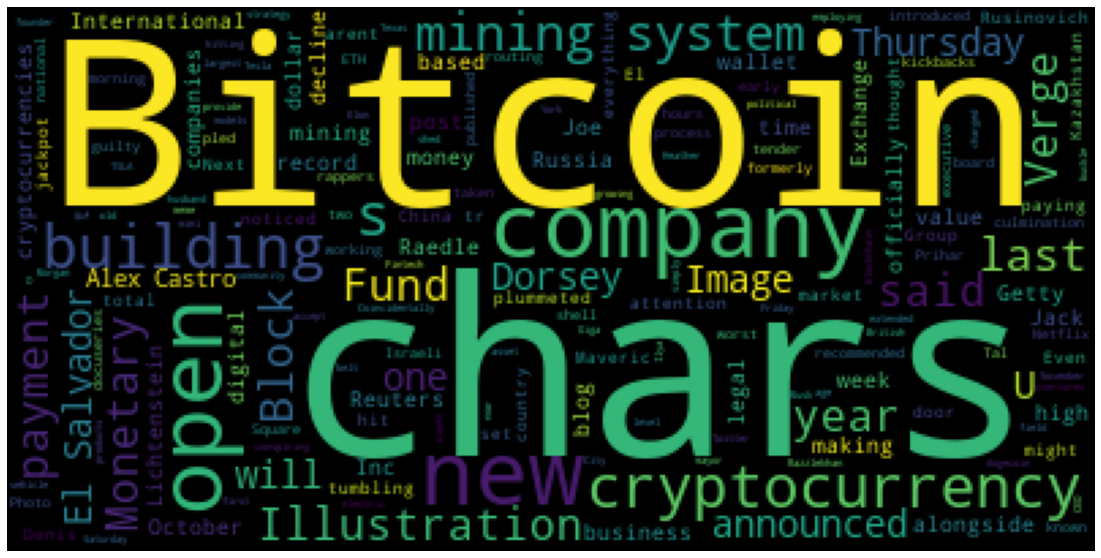

In [23]:
# Generate the Bitcoin word cloud
bitcoin_word_cloud = WordCloud().generate(big_string_bitcoin)
plt.imshow(bitcoin_word_cloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

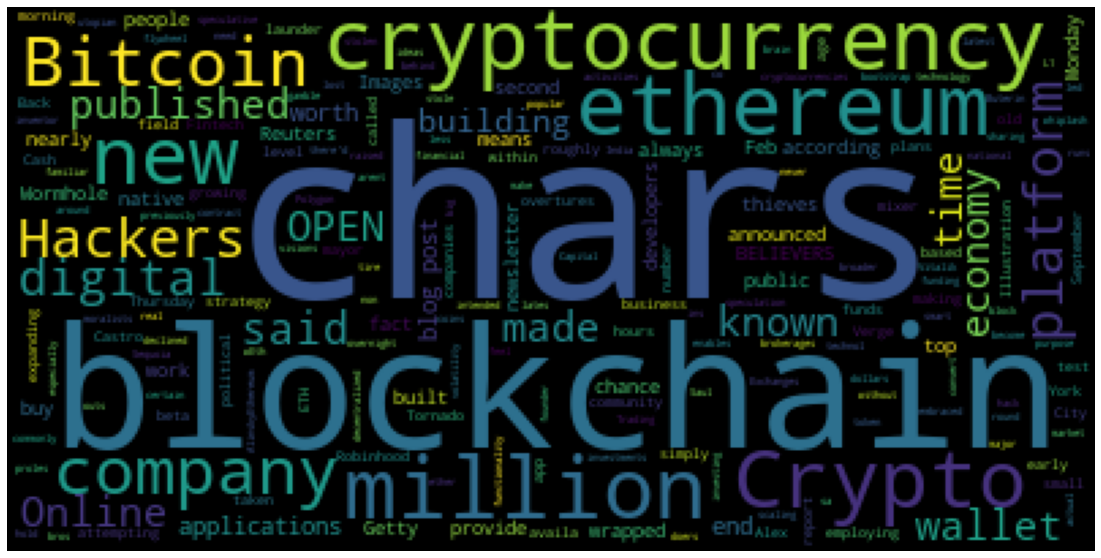

In [24]:
# Generate the Ethereum word cloud
ethereum_word_cloud = WordCloud().generate(big_string_ethereum)
plt.imshow(ethereum_word_cloud)
plt.axis("off")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
bitcoin_text = (big_string_bitcoin)

In [29]:
# Run the NER processor on all of the text
ner_bitcoin = nlp(bitcoin_text)

# Add a title to the document
ner_bitcoin.user_data["Bitcoin NER Visualization"] = "Bitcoin NER Visualization"

In [30]:
# Render the visualization
displacy.render(ner_bitcoin, style = "ent")

In [31]:
# List all Entities
for ent in ner_bitcoin.ents:
    print(ent.text)

last week
3
Denis Rusinovich
Maveric Group
Kazakhstan
2017
China
Russia
chars]El Salvador
US
2021
Alex Castro
Verge
The International Monetary Fund’s
El
Bitcoin
Joe Raedle/Getty Images
Square
Bitcoin
Tal Prihar
Illustration
Alex Castro
Verge
two-year
4,836
ETH
443
Alex Castro
Verge
the early hours
Thursday
morning
about one
Ilya Lichtenstein
this week
Saturday
more than 50%
November
more than $
Jack Dorsey
Twitter
first
October last year
the "Giga Texas
Elon Musk
Friday
Fintech
New York City
Richard ODell
house
October
Poulde
chars]Russia
Thursday
Russian
the last five years
about 25,000
Lichtensteins
Bitcoin
El Salvador
US
The International Monetary Fund
El Salvador
Reuters
Jan 26
Reuters
The U.S. Securities and Exchange Commission
Thursday
ETF
Fidelitys Wise Origin Bitcoin
+202
Dorsey
June
Joe Raedle/Getty Images
one
Tuesday
$4.5 billion
September
Robinhood
one 2020


---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
ethereum_text = (big_string_ethereum)

In [33]:
# Run the NER processor on all of the text
ner_ethereum = nlp(ethereum_text)

# Add a title to the document
ner_ethereum.user_data["Ethereum NER Visualization"] = "Ethereum NER Visualization"

In [34]:
# Render the visualization
displacy.render(ner_ethereum, style = "ent")

In [35]:
# List all Entities
for ent in ner_ethereum.ents:
    print(ent.text)

4,836
ETH
443
Alex Castro
Verge
the early hours
Thursday
morning
roughly $15 million
Crypto.com
Tornado Cash
Fintech
New York City
September
Robinhood
Crypto.com
about $34 million
Monday
Ethereum
Vitalik Buterin
Ethereum
7
Reuters
Monday
$450 million
Sequoia Capital India
OPEN
second
OPEN
second
nearly $324 million
Getty Images
more than $324 million
Wormhole
120,000
wEth
Ethereum
nearly $324 million
Getty Images
more than $324 million
Wormhole
chars]In
Bloomberg TV
Crypto.com
Kris Marszalek
400
Richard ODell
house
October
Poulde
4
Reuters
8.82%
40,611.4
2202
Friday
3,291.29
Bitcoin
23.2%
TIME
weekly
Vita


---